## **Load data**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive').

In [3]:
#pip install pandas

In [4]:
#!pip install matplotlib
#!pip install seaborn

In [5]:
#!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

ratings=pd.read_csv('olist_order_reviews_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
orderitems=pd.read_csv('olist_order_items_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
payments=pd.read_csv('olist_order_payments_dataset.csv')
category=pd.read_csv('product_category_name_translation.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')

## **Data Cleaning**

In [7]:
df=pd.merge(customers, orders, on='customer_id', how='inner')
df=df.merge(ratings, on="order_id", how='inner')
df=df.merge(orderitems, on="order_id", how='inner')
df=df.merge(products, on="product_id", how='inner')
df=df.merge(payments, on="order_id", how='inner')
df=df.merge(sellers, on='seller_id', how='inner')
df=df.merge(category, on='product_category_name', how='inner')
df.shape

(115609, 40)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [9]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0


In [10]:
df.describe(include='object').transpose()

,count,unique,top,freq
customer_id,115609,96516,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,115609,93396,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,115609,4093,sao paulo,18267
customer_state,115609,27,SP,48798
order_id,115609,96516,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,115609,7,delivered,113210
order_purchase_timestamp,115609,86415,8/8/2017 20:26,63
order_approved_at,115595,49475,10/1/2018 10:32,118
order_delivered_carrier_date,114414,60487,10/8/2017 11:58,63
order_delivered_customer_date,113209,74373,14/8/2017 12:46,63


In [11]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df=df.drop(['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_comment_title','review_creation_date','review_answer_timestamp'], axis=1)

In [14]:
df.shape

(115609, 25)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   review_id                      115609 non-null  object 
 9   review_score                   115609 non-null  int64  
 10  review_comment_message         48906 non-null   object 
 11  order_item_id                  115609 non-null  int64  
 12  product_id                    

In [16]:
print(df['customer_city'].unique())
print(df['customer_state'].unique())
print(df['order_status'].unique())
print(df['payment_sequential'].unique())
print(df['payment_type'].unique())
print(df['payment_installments'].unique())
print(df['seller_city'].unique())
print(df['seller_state'].unique())

['franca' 'santarem' 'nova santa rita' ... 'mocajuba' 'sabaudia'
 'nova guataporanga']
['SP' 'PA' 'RS' 'RJ' 'SC' 'MG' 'MT' 'BA' 'ES' 'PR' 'MS' 'CE' 'RN' 'TO'
 'MA' 'GO' 'PI' 'PE' 'DF' 'PB' 'AL' 'SE' 'RO' 'AM' 'RR' 'AP' 'AC']
['delivered' 'shipped' 'invoiced' 'processing' 'canceled' 'unavailable'
 'approved']
[ 1  2  3  4  5  7  6 15  9 11  8 14 13 19 10 17 12 16 18 21 20 26 25 24
 22 23 27 29 28]
['credit_card' 'boleto' 'voucher' 'debit_card']
[ 2  1  7 10  5  3  6 13  8  4  9 18 12 15 14 11 17 20 24 16  0 21 23 22]
['itaquaquecetuba' 'salto' 'blumenau' 'sao paulo' 'pinhais' 'mogi guacu'
 'uba' 's jose do rio preto' 'curitiba' 'araraquara' 'santo andre'
 'nova friburgo' 'sao bernardo do campo' 'bady bassitt' 'guarulhos'
 'lajeado' 'cambe' 'portoferreira' 'osasco' 'ponta grossa'
 'lencois paulista' 'cataguases' 'cascavel' 'ibitinga' 'rio de janeiro'
 'taubate' 'piracicaba' 'porto alegre' 'amparo' 'toledo' 'limeira'
 'uberlandia' 'aruja' 'betim' 'porto ferreira' 'vassouras' 'foz do iguac

In [17]:
print("Number of Customer City: ",df['customer_city'].nunique())
print("Number of Customer State: ",df['customer_state'].nunique())
print("Order Status Types: ",df['order_status'].nunique())
print("Payment Sequential Types: ",df['payment_sequential'].nunique())
print("Number of Payment Types: ",df['payment_type'].nunique())
print("Number of Payment Installments: ",df['payment_installments'].nunique())
print("Number of Seller City: ",df['seller_city'].nunique())
print("Number of Seller State: ",df['seller_state'].nunique())

Number of Customer City:  4093
Number of Customer State:  27
Order Status Types:  7
Payment Sequential Types:  29
Number of Payment Types:  4
Number of Payment Installments:  24
Number of Seller City:  604
Number of Seller State:  23


In [18]:
df.describe(include='object').transpose()

,count,unique,top,freq
customer_id,115609,96516,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,115609,93396,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,115609,4093,sao paulo,18267
customer_state,115609,27,SP,48798
order_id,115609,96516,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,115609,7,delivered,113210
order_purchase_timestamp,115609,86415,8/8/2017 20:26,63
review_id,115609,96319,eef5dbca8d37dfce6db7d7b16dd0525e,63
review_comment_message,48906,35172,Muito bom,253
product_id,115609,32171,aca2eb7d00ea1a7b8ebd4e68314663af,533


In [19]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99730.000000


In [20]:
df['review_comment_message']=df['review_comment_message'].apply(str)

In [21]:
#pd.set_option('max_columns', None)

In [22]:
#pd.set_option("max_rows", None)

In [23]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_id,review_score,...,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,...,21.88,moveis_escritorio,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,24.90,moveis_escritorio,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,24.90,moveis_escritorio,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,...,15.62,moveis_escritorio,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,...,30.59,moveis_escritorio,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,27/5/2017 14:03,d80889ac5e64526148081227745e82d7,5,...,39.19,la_cuisine,1,credit_card,10,232.19,89701,concordia,SC,la_cuisine
115605,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,31/3/2018 19:17,45c02db2f81c1968c58f08d46694213d,4,...,37.70,la_cuisine,1,credit_card,8,426.70,89701,concordia,SC,la_cuisine
115606,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,28/8/2017 9:48,f8c39654aa2349dfb94f274ccefe7c80,5,...,21.46,la_cuisine,1,credit_card,3,160.46,89701,concordia,SC,la_cuisine
115607,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,31/7/2017 18:10,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,26.18,la_cuisine,1,credit_card,2,55.18,89701,concordia,SC,la_cuisine


### ***Feature Engineering***

In [24]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'

    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'

    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'

    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'

    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'

    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'

    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'

    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'

    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [25]:
df.product_category.value_counts()

product_category
Electronics                30256
Furniture                  28565
Entertainment              13821
Beauty & Health            13558
Home & Garden              13106
Fashion                     9950
Books & Stationery          3499
Industry & Construction     1669
Food & Drinks               1185
Name: count, dtype: int64

In [26]:
df['product_category_name_english'] = df['product_category_name_english'].str.replace('_', ' ')

In [27]:
df['payment_type'] = df['payment_type'].str.replace('_', ' ')

In [28]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_id,review_score,...,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,...,moveis_escritorio,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,moveis_escritorio,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,moveis_escritorio,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,...,moveis_escritorio,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,...,moveis_escritorio,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,27/5/2017 14:03,d80889ac5e64526148081227745e82d7,5,...,la_cuisine,1,credit card,10,232.19,89701,concordia,SC,la cuisine,Home & Garden
115605,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,31/3/2018 19:17,45c02db2f81c1968c58f08d46694213d,4,...,la_cuisine,1,credit card,8,426.70,89701,concordia,SC,la cuisine,Home & Garden
115606,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,28/8/2017 9:48,f8c39654aa2349dfb94f274ccefe7c80,5,...,la_cuisine,1,credit card,3,160.46,89701,concordia,SC,la cuisine,Home & Garden
115607,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,31/7/2017 18:10,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,la_cuisine,1,credit card,2,55.18,89701,concordia,SC,la cuisine,Home & Garden


## **EDA**

## Univariate Analysis

In [29]:
sns.set(font_scale=0.8)

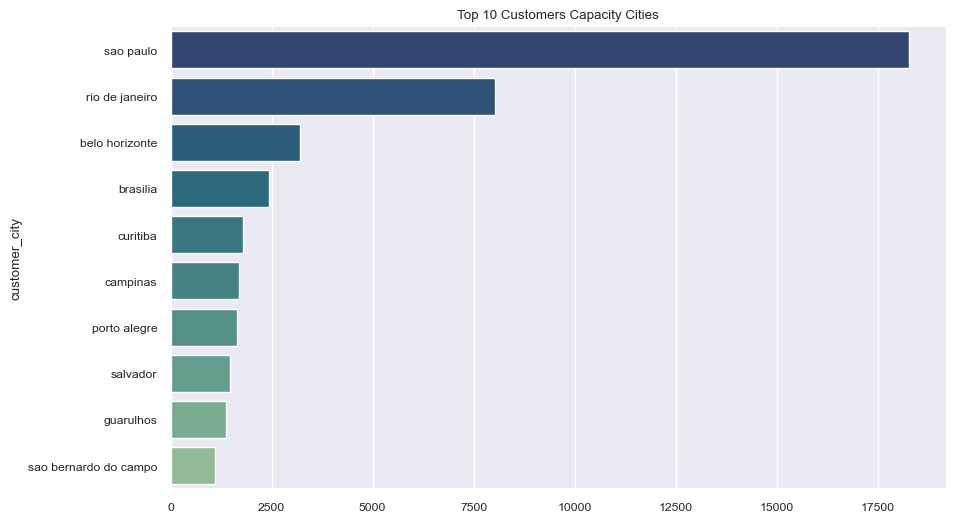

In [30]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_city.value_counts().values[:10], y = df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

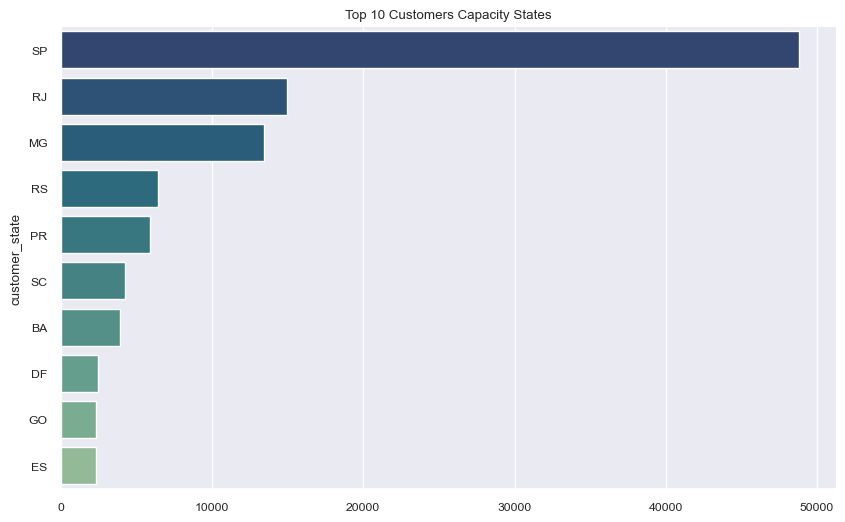

In [31]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_state.value_counts().values[:10], y = df.customer_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

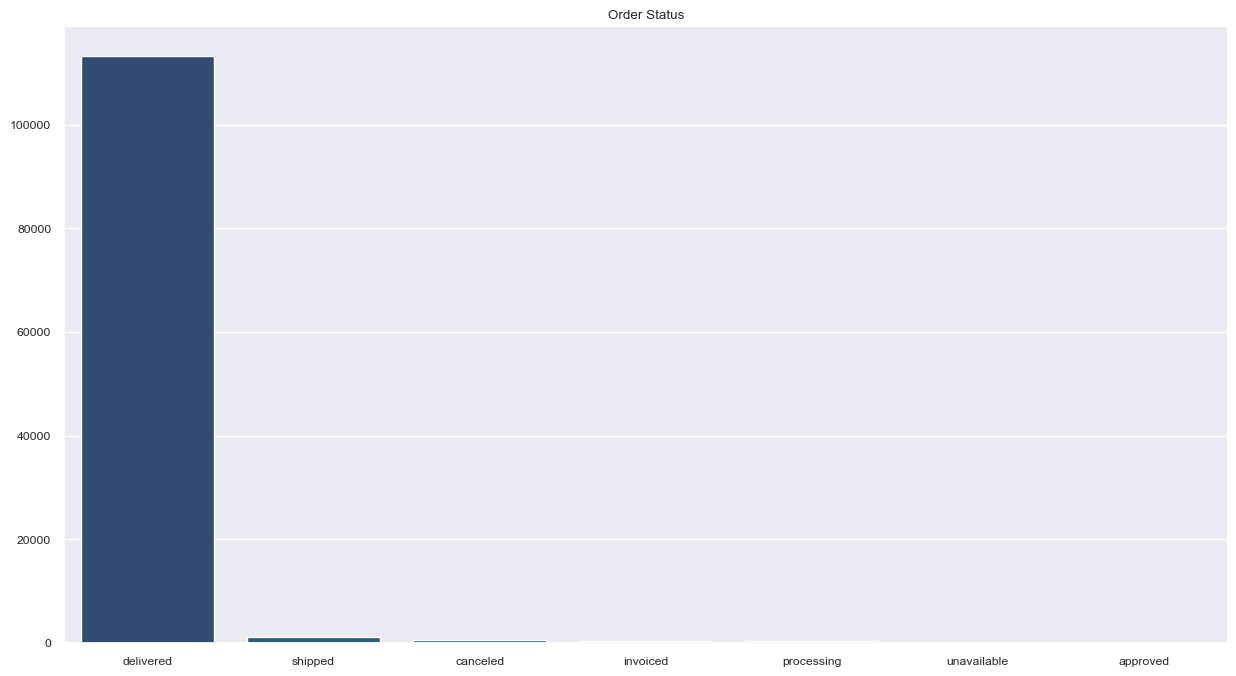

In [32]:
plt.figure(figsize=[15, 8])
order_status_index = [str(i) for i in df.order_status.value_counts().index]
sns.barplot(x = order_status_index, y= df.order_status.value_counts().values, palette= 'crest_r')
plt.title('Order Status')
sns.despine()

Due to the extreme imbalance and lack of variance in the feature, we should drop it.

In [33]:
df.drop('order_status', axis=1, inplace=True)

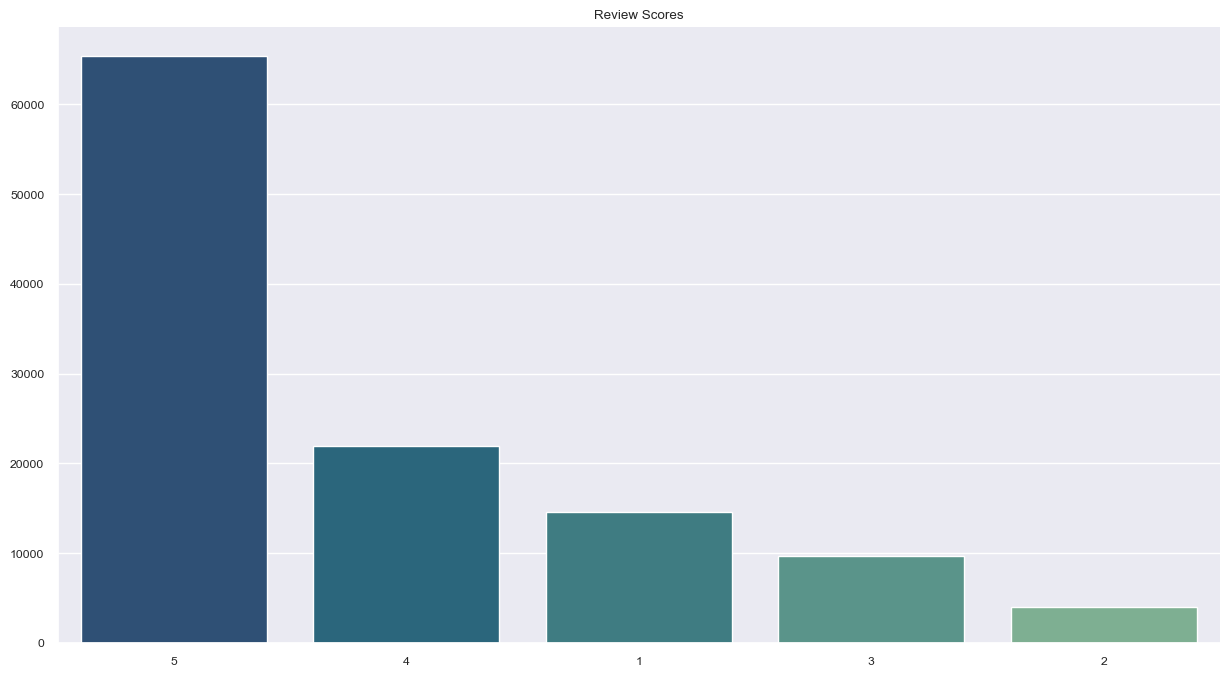

In [34]:
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in df.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= df.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

C:\Users\oneaz\AppData\Local\Temp\ipykernel_2492\3631056187.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.price, color='red')


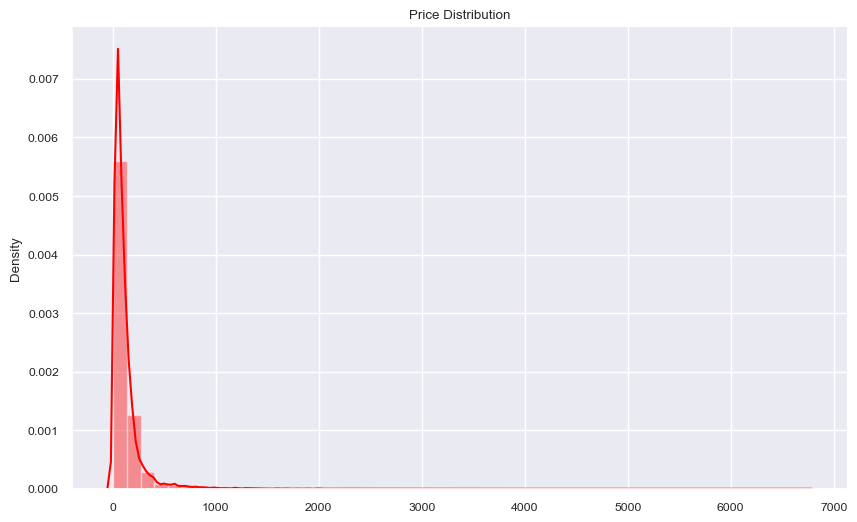

In [35]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.price, color='red')
plt.title('Price Distribution')
sns.despine()

C:\Users\oneaz\AppData\Local\Temp\ipykernel_2492\1568902605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.freight_value, color='green')


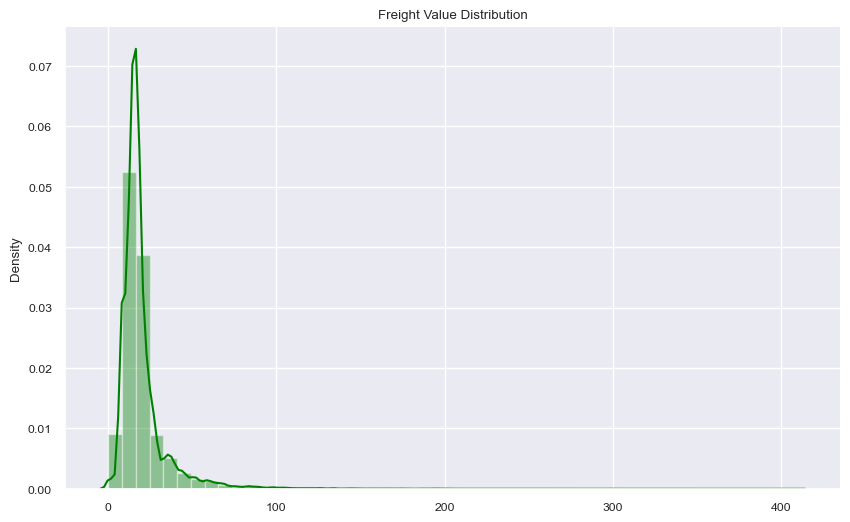

In [36]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.freight_value, color='green')
plt.title('Freight Value Distribution')
sns.despine()

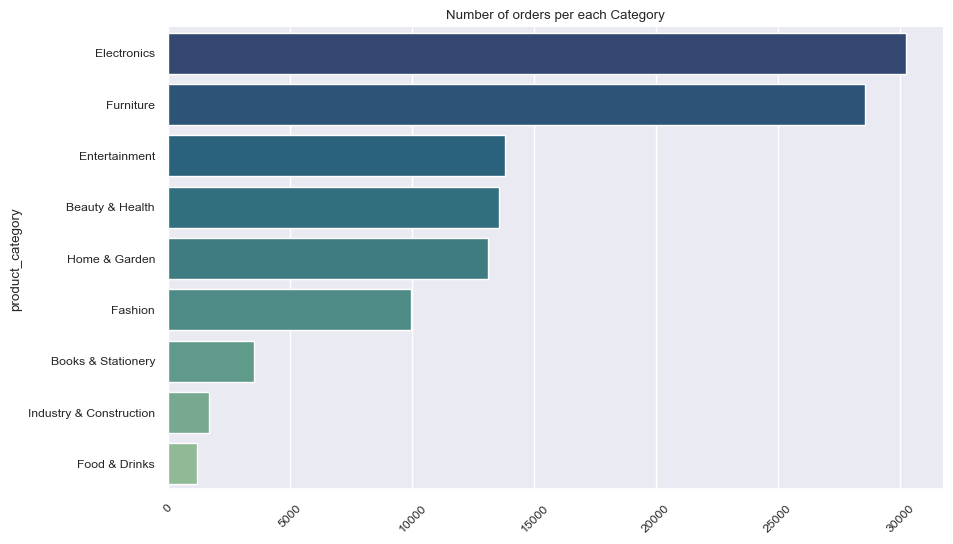

In [37]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

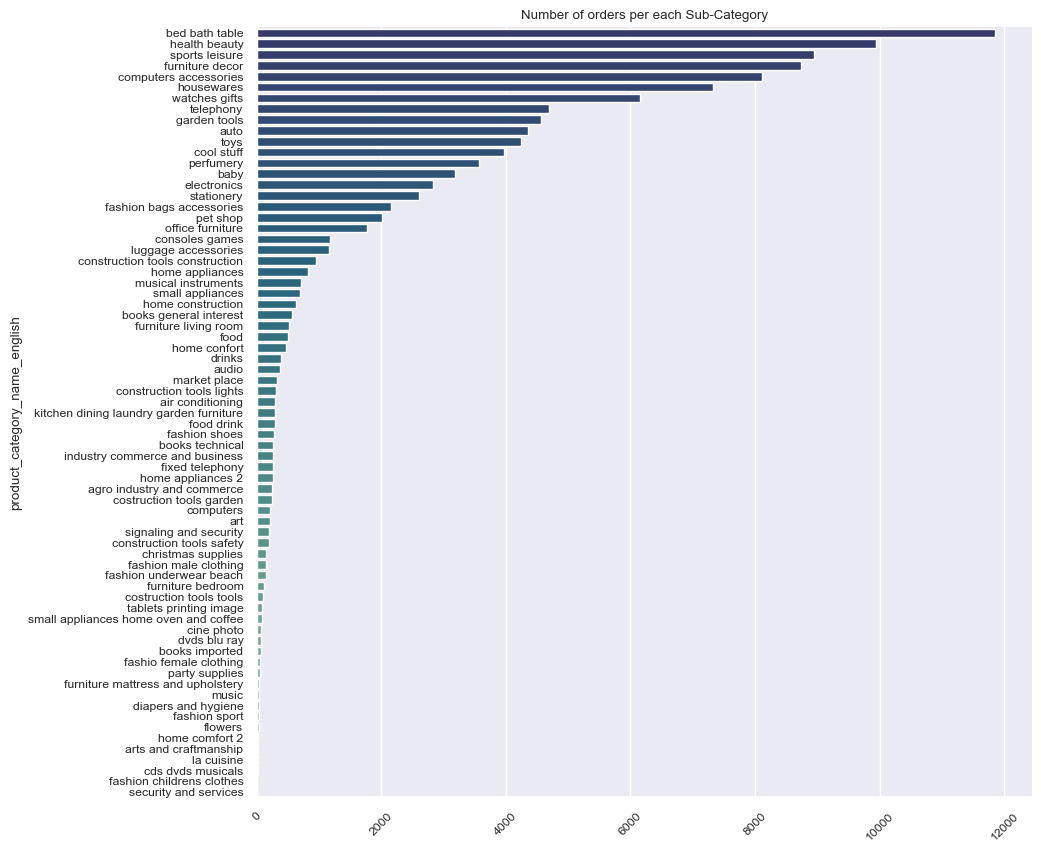

In [38]:
plt.figure(figsize=[10, 10])
sns.barplot(x = df.product_category_name_english.value_counts().values, y = df.product_category_name_english.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Sub-Category')
plt.xticks(rotation = 45)
sns.despine()

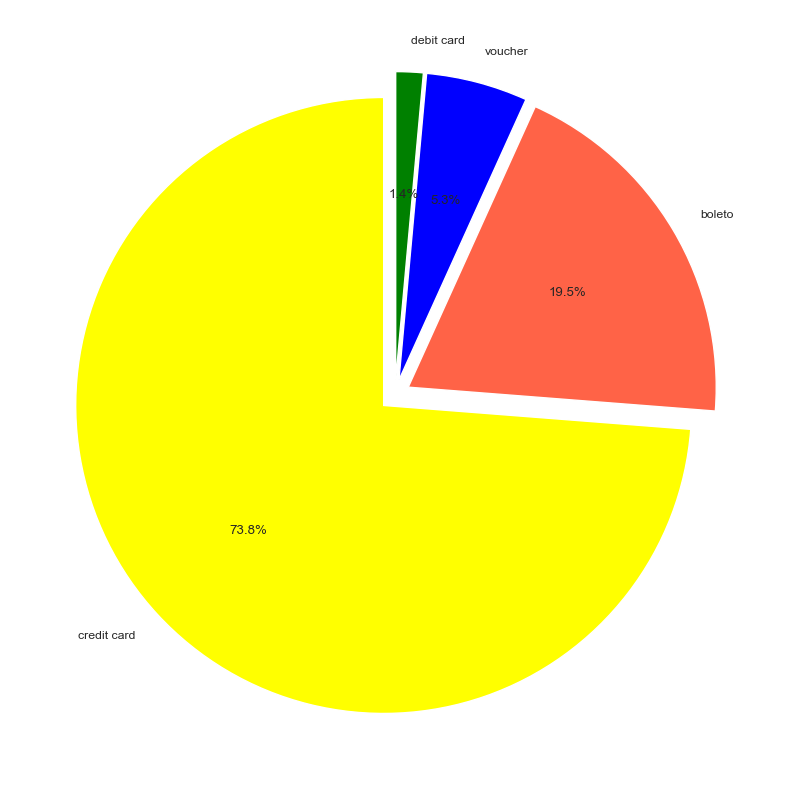

In [39]:
plt.figure(figsize=[10, 10])
plt.pie(df.payment_type.value_counts().values, explode=(0.05, 0.05, 0.05, 0.05), labels= df.payment_type.value_counts().index, autopct='%1.1f%%', startangle=90, colors=['yellow','tomato','blue','green']);

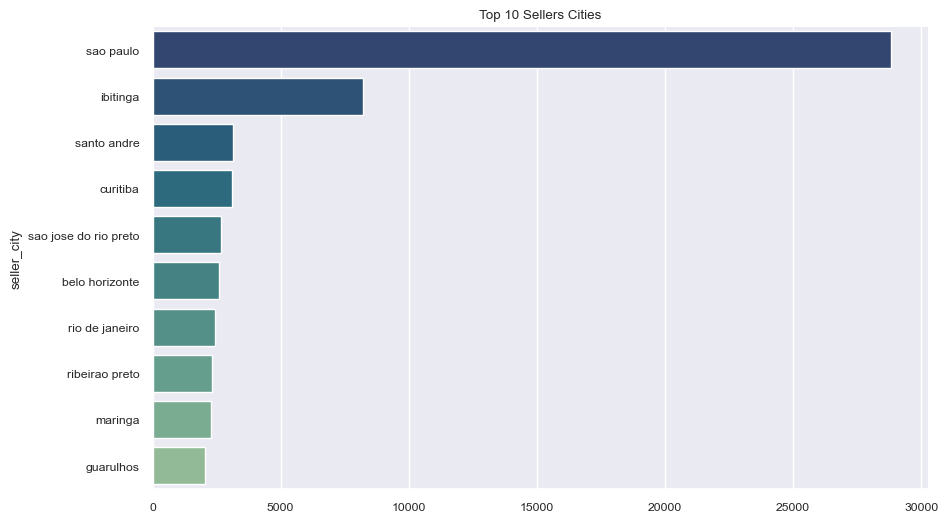

In [40]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

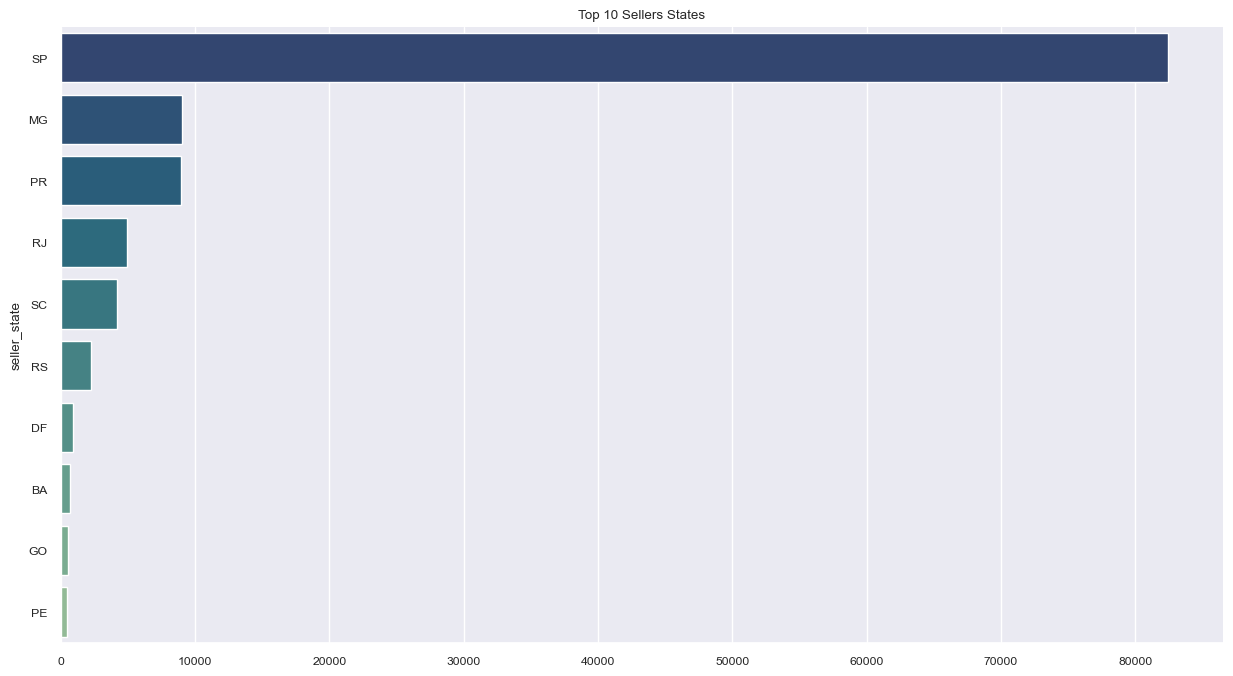

In [41]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df.seller_state.value_counts().values[:10], y= df.seller_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers States')
sns.despine()

In [42]:
df.payment_installments.value_counts()

payment_installments
1     57599
2     13404
3     11551
4      7855
10     6785
5      5928
8      5013
6      4546
7      1789
9       710
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
17        7
16        7
21        6
0         3
23        1
22        1
Name: count, dtype: int64

In [43]:
df[df.payment_installments == 0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category
29768,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,15/5/2018 16:25,bc5dca6c957c328b1cbff760b0841fd2,5,nan,...,utilidades_domesticas,2,credit card,0,129.94,31573,belo horizonte,MG,housewares,Home & Garden
29769,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,15/5/2018 16:25,bc5dca6c957c328b1cbff760b0841fd2,5,nan,...,utilidades_domesticas,2,credit card,0,129.94,31573,belo horizonte,MG,housewares,Home & Garden
98815,5e5794daaa13f73e2f1cdb4114529843,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,744bade1fcf9ff3f31d860ace076d422,22/4/2018 11:34,c56b4b7042f417e70d3dc5340deb23fe,5,nan,...,telefonia,2,credit card,0,58.69,14401,franca,SP,telephony,Electronics


In [44]:
#drop indices
df.drop([29768, 29769, 98815], inplace=True)
#reset Index
df.reset_index(inplace= True, drop= True)

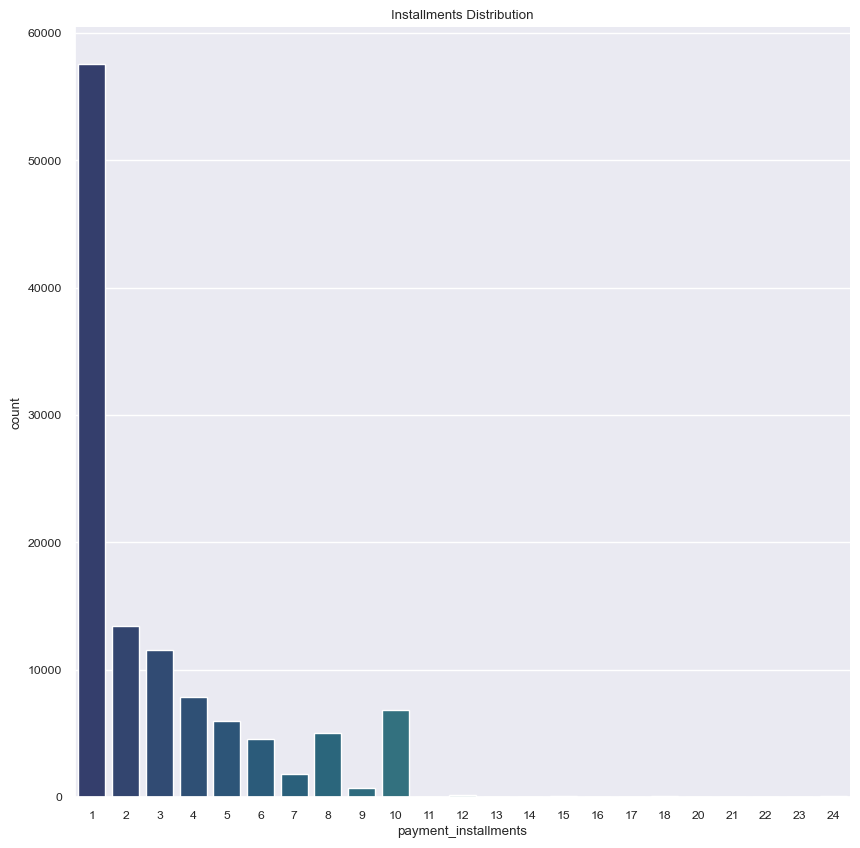

In [45]:
plt.figure(figsize=[10, 10])
sns.countplot(x = df.payment_installments, palette= 'crest_r')
plt.title('Installments Distribution')
sns.despine()

C:\Users\oneaz\AppData\Local\Temp\ipykernel_2492\746456449.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.payment_value)


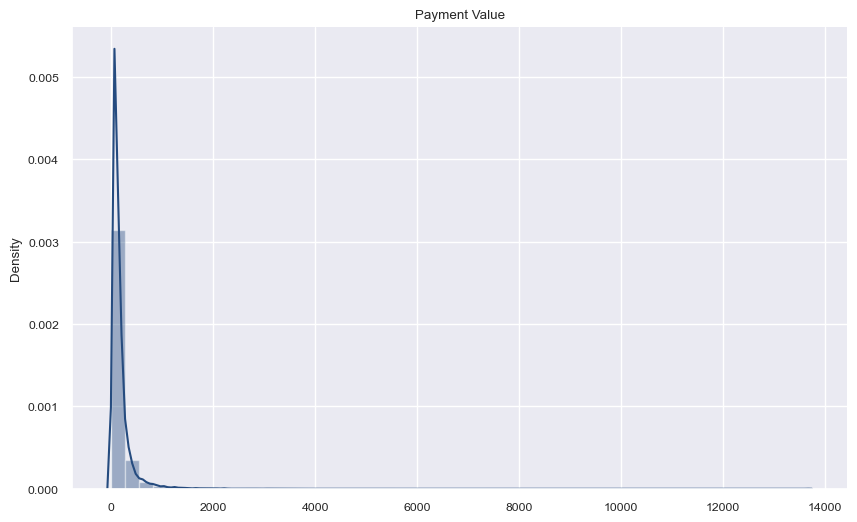

In [46]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.payment_value)
plt.title('Payment Value')
sns.despine()

## Multivariate Analysis

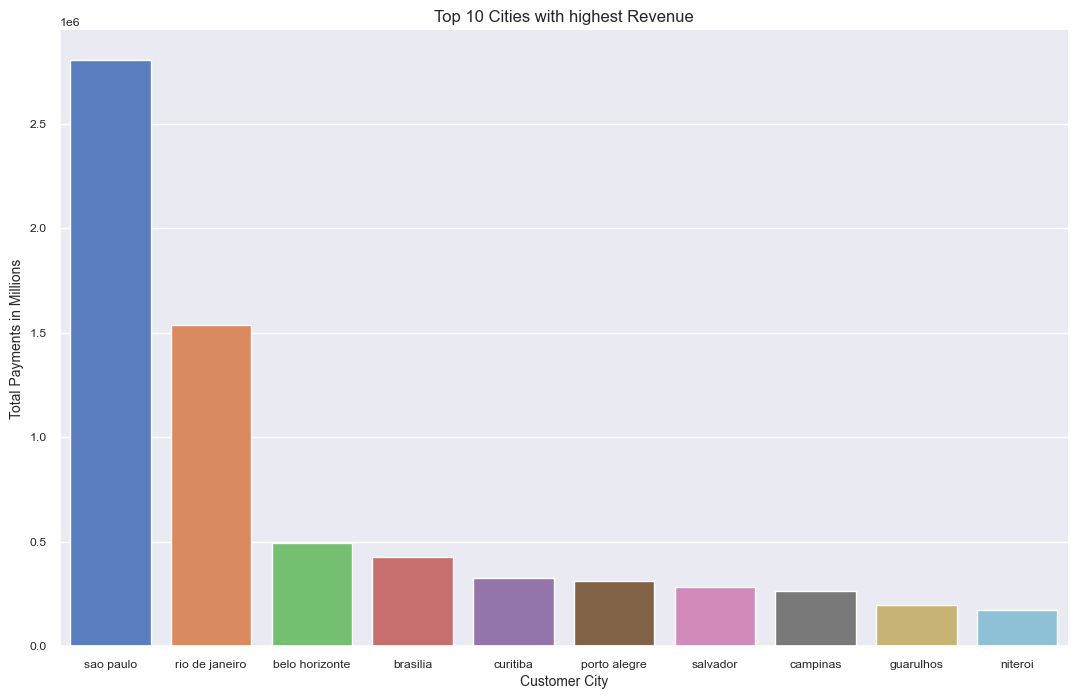

In [47]:
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

plt.figure(figsize=[13, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'muted')
plt.title('Top 10 Cities with highest Revenue', fontsize= 12)
plt.xlabel('Customer City', fontsize= 10)
plt.ylabel('Total Payments in Millions', fontsize= 10)
sns.despine()

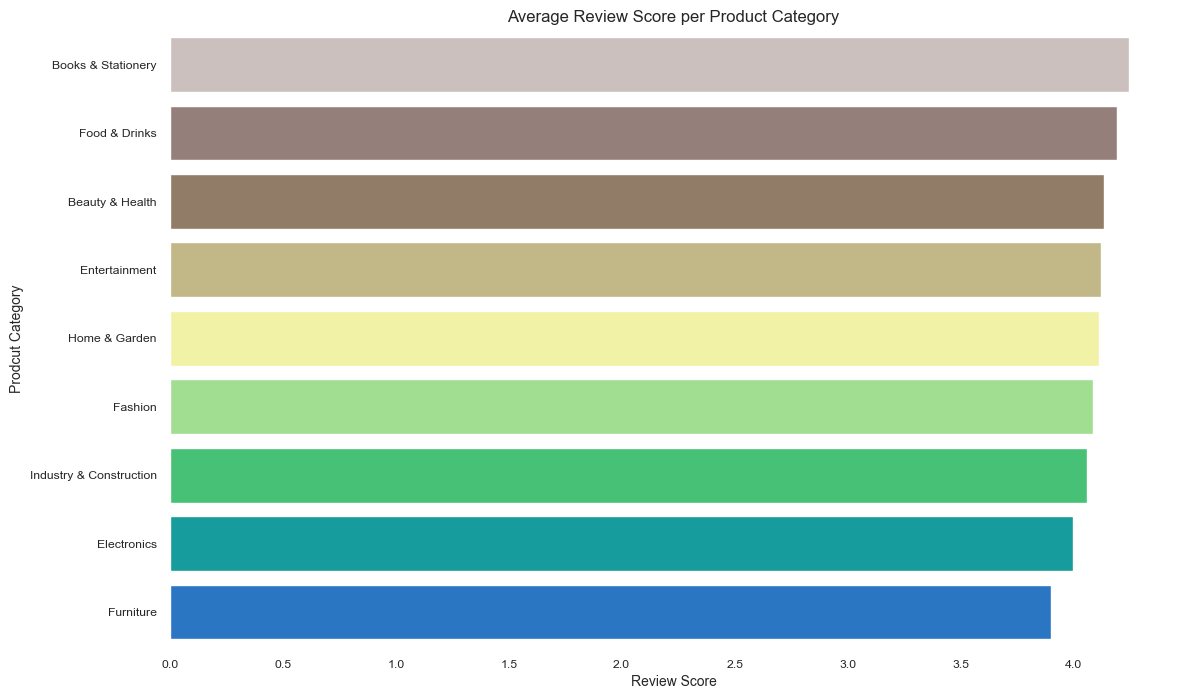

In [48]:
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

plt.figure(figsize=[13, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'terrain_r')
plt.title('Average Review Score per Product Category', fontsize= 12)
plt.xlabel('Review Score', fontsize= 10)
plt.ylabel('Prodcut Category', fontsize= 10)
ax = plt.gca()
ax.set_frame_on(False);

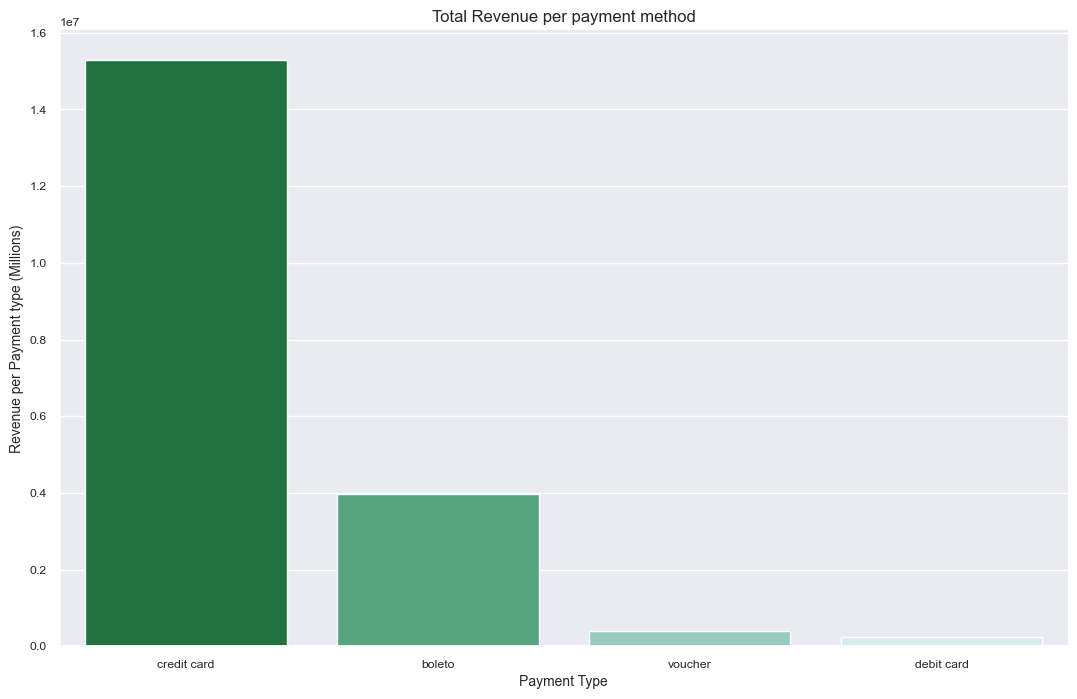

In [49]:
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

plt.figure(figsize=[13, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'BuGn_r')
plt.title('Total Revenue per payment method', fontsize= 12)
plt.xlabel('Payment Type', fontsize= 10)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 10)
sns.despine()

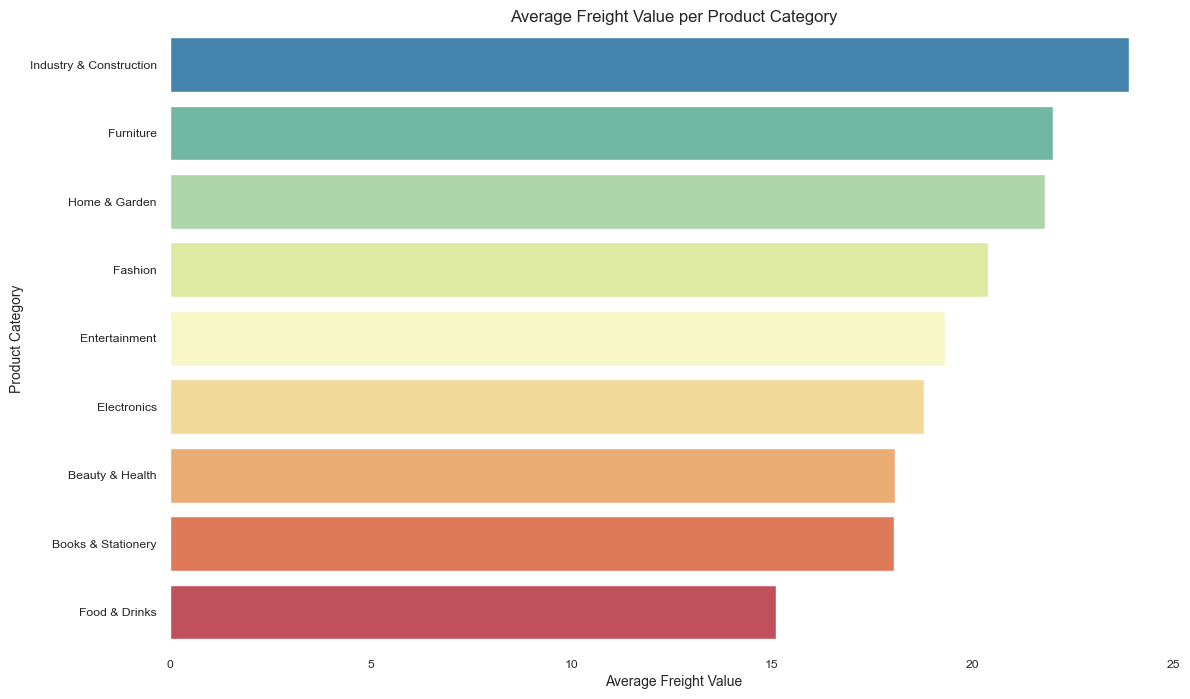

In [50]:
freight_per_cat = df.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[13, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'Spectral_r')
plt.title('Average Freight Value per Product Category', fontsize= 12)
plt.xlabel('Average Freight Value',fontsize= 10)
plt.ylabel('Product Category', fontsize= 10)
ax = plt.gca()
ax.set_frame_on(False);

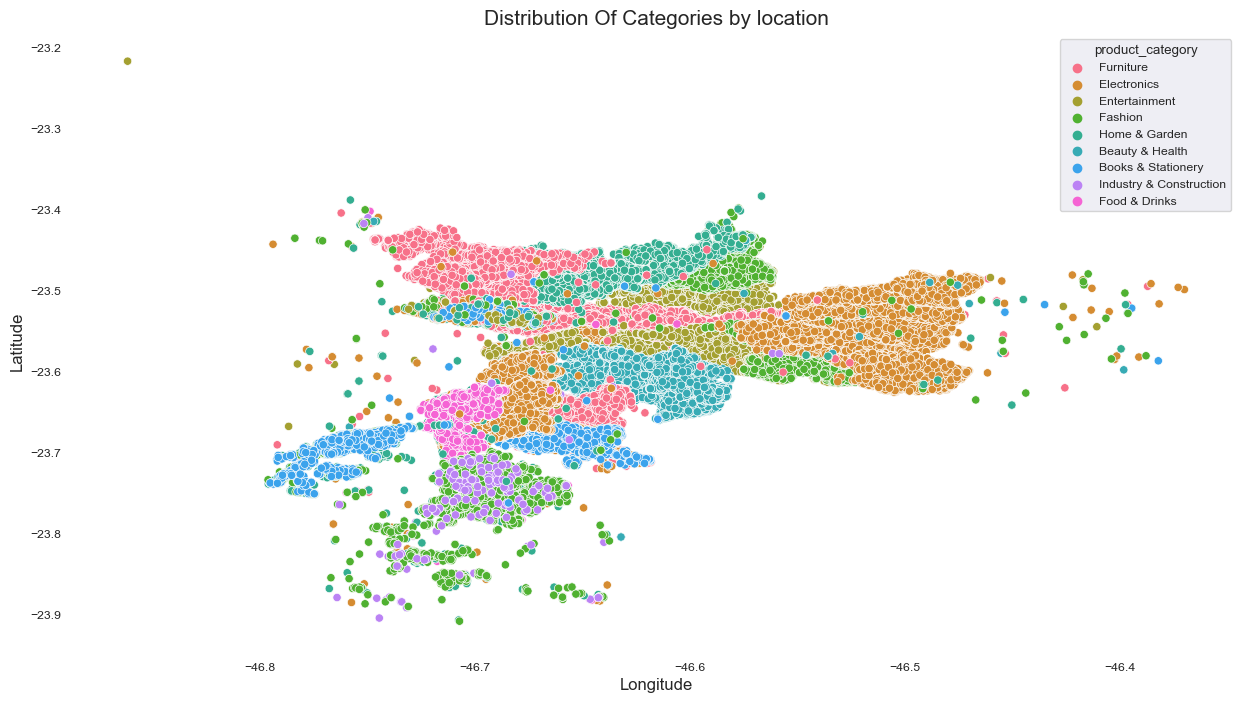

In [51]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation.geolocation_lng, y = geolocation.geolocation_lat, hue= df.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

## **Data PreProcessing**

In [52]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied',
                  3 : 'Neutral',
                  4 : 'Satisfied',
                  5 : 'Satisfied'}

df['review'] = df['review_score'].map(encoded_class)

In [53]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115601,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,27/5/2017 14:03,d80889ac5e64526148081227745e82d7,5,Ótimo vendedor,...,1,credit card,10,232.19,89701,concordia,SC,la cuisine,Home & Garden,Satisfied
115602,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,31/3/2018 19:17,45c02db2f81c1968c58f08d46694213d,4,nan,...,1,credit card,8,426.70,89701,concordia,SC,la cuisine,Home & Garden,Satisfied
115603,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,28/8/2017 9:48,f8c39654aa2349dfb94f274ccefe7c80,5,nan,...,1,credit card,3,160.46,89701,concordia,SC,la cuisine,Home & Garden,Satisfied
115604,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,31/7/2017 18:10,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,Recomendo,...,1,credit card,2,55.18,89701,concordia,SC,la cuisine,Home & Garden,Satisfied


In [54]:
'''import seaborn as sns
plt.figure(figsize= [10, 6])
sns.heatmap(df.corr(), annot= True)'''

'import seaborn as sns\nplt.figure(figsize= [10, 6])\nsns.heatmap(df.corr(), annot= True)'

## **NLP**

In [55]:
df.dropna(inplace= True)
df.reset_index(inplace= True, drop= True)

In [56]:
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_purchase_timestamp         0
review_id                        0
review_score                     0
review_comment_message           0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
product_category                 0
review                           0
dtype: int64

In [57]:
df2=df[0:20000]
df2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,984e2ab6a072e04516bca3040606d641,9ec2ff36367734940e440491b6e4f59a,35600,bom despacho,MG,ee8725c782f35716fe7a9e445bbf0a78,11/9/2017 9:46,6f8f1480a063dfa15164baddcb4dc768,5,nan,...,1,boleto,1,92.90,89120,timbo,SC,sports leisure,Entertainment,Satisfied
19996,e8c9e9de9411a9a78629b376f75b18b3,acc71fc18279e5859ab1e867a2e6aec4,89245,araquari,SC,5d333a08c9bce16bf18ed14c4469c1ce,3/10/2017 22:51,0214baa1c6d16bbfe6b016f8e4c8dd6a,1,"Recebi, antes do prazo de entrega. Porém no me...",...,1,credit card,1,79.51,89120,timbo,SC,sports leisure,Entertainment,Not Satisfied
19997,48a0d58b5c9638c5d1bd192c4143f971,4426a915a8e65d0f7c66a021b1590559,95630,parobe,RS,f3946e7bb785f6ad1f6747355f2f0707,13/9/2017 16:48,65613a7e99fb0b7dfa2f37a1aebe8680,5,nan,...,1,boleto,1,82.12,89120,timbo,SC,sports leisure,Entertainment,Satisfied
19998,764b644da47fd5bb41b7d78590cffaa6,edb02b1c1d841706083765e2c524fd01,13024,campinas,SP,13c8da80a4b1a89a063dee494d324423,5/2/2017 19:34,9ef12de4c2174d61a6c6848b8a6a0b03,5,nan,...,1,boleto,1,81.57,89120,timbo,SC,sports leisure,Entertainment,Satisfied


In [58]:
#pip install nltk

In [59]:
'''import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
corpus = []

for i in range(df2.shape[0]):
    #remove any special characters or number
    review_comment_message = re.sub('[^a-zA-Z]', ' ', df2.review_comment_message[i])
    #lower text
    review_comment_message = review_comment_message.lower()
    #remove any spaces
    review_comment_message = review_comment_message.strip()
    #stemming
    review_comment_message = review_comment_message.split()
    #stemming words in Portugues
    review_comment_message = [stemmer.stem(word) for word in review_comment_message if word not in set(stopwords.words('portuguese'))]
    #merge
    review_comment_message = ' '.join(review_comment_message)

    corpus.append(review_comment_message)

corpus'''

"import re\nimport nltk\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords\nfrom nltk.stem.porter import PorterStemmer\n\nstemmer = PorterStemmer()\ncorpus = []\n\nfor i in range(df2.shape[0]):\n    #remove any special characters or number\n    review_comment_message = re.sub('[^a-zA-Z]', ' ', df2.review_comment_message[i])\n    #lower text\n    review_comment_message = review_comment_message.lower()\n    #remove any spaces\n    review_comment_message = review_comment_message.strip()\n    #stemming\n    review_comment_message = review_comment_message.split()\n    #stemming words in Portugues\n    review_comment_message = [stemmer.stem(word) for word in review_comment_message if word not in set(stopwords.words('portuguese'))]\n    #merge\n    review_comment_message = ' '.join(review_comment_message)\n\n    corpus.append(review_comment_message)\n\ncorpus"

In [60]:
#pip install scikit-learn

In [61]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

#TFIDF Vectorizer convert text into numbers
tf = TfidfVectorizer()
comments_new = tf.fit_transform(corpus).toarray()'''

'from sklearn.feature_extraction.text import TfidfVectorizer\n\n#TFIDF Vectorizer convert text into numbers\ntf = TfidfVectorizer()\ncomments_new = tf.fit_transform(corpus).toarray()'

In [62]:
'''comments_new = pd.DataFrame(comments_new, columns= tf.get_feature_names())
comments_new'''

'comments_new = pd.DataFrame(comments_new, columns= tf.get_feature_names())\ncomments_new'

## Split into train and test

In [63]:
#pip install --upgrade scikit-learn

In [64]:
#X = comments_new
##y = df2['review']

In [65]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [66]:
'''from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)'''

#print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
#print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))

#ConfusionMatrixDisplay(nb, x_train, y_train)
#ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test)

'from sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay\nnb = MultinomialNB()\nnb.fit(x_train, y_train)\ny_pred = nb.predict(x_test)'

In [67]:
#check reasons of non satisfaction 
'''not_satisfied = df2[df2.review == 'Not Satisfied']
not_satisfied.reset_index(inplace= True, drop= True)'''

"not_satisfied = df2[df2.review == 'Not Satisfied']\nnot_satisfied.reset_index(inplace= True, drop= True)"

In [68]:
'''stemmer = PorterStemmer()
corpus = []

for i in range(not_satisfied.shape[0]):
    review_comment_message = re.sub('[^a-zA-Z]', ' ', not_satisfied.review_comment_message[i])
    review_comment_message = review_comment_message.lower()
    review_comment_message = review_comment_message.strip()
    review_comment_message = review_comment_message.split()
    review_comment_message = [stemmer.stem(word) for word in review_comment_message if word not in set(stopwords.words('portuguese'))]
    review_comment_message = ' '.join(review_comment_message)

    corpus.append(review_comment_message)

corpus'''

"stemmer = PorterStemmer()\ncorpus = []\n\nfor i in range(not_satisfied.shape[0]):\n    review_comment_message = re.sub('[^a-zA-Z]', ' ', not_satisfied.review_comment_message[i])\n    review_comment_message = review_comment_message.lower()\n    review_comment_message = review_comment_message.strip()\n    review_comment_message = review_comment_message.split()\n    review_comment_message = [stemmer.stem(word) for word in review_comment_message if word not in set(stopwords.words('portuguese'))]\n    review_comment_message = ' '.join(review_comment_message)\n\n    corpus.append(review_comment_message)\n\ncorpus"

In [69]:
#!pip install deep_translator

In [70]:
'''from deep_translator import GoogleTranslator
import random

not_satisfied_trans = []
random.seed(42)

for sentence in random.sample(corpus, 1000):
    not_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))
    
not_satisfied_trans'''

"from deep_translator import GoogleTranslator\nimport random\n\nnot_satisfied_trans = []\nrandom.seed(42)\n\nfor sentence in random.sample(corpus, 1000):\n    not_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))\n    \nnot_satisfied_trans"

In [71]:
#len(not_satisfied_trans)

In [72]:
#stemming
'''not_satisfied_final = []

for sent in not_satisfied_trans:

    for word in sent.split():

        if word not in set(stopwords.words('english')):

            not_satisfied_final.append(stemmer.stem(word))

not_satisfied_final'''

"not_satisfied_final = []\n\nfor sent in not_satisfied_trans:\n\n    for word in sent.split():\n\n        if word not in set(stopwords.words('english')):\n\n            not_satisfied_final.append(stemmer.stem(word))\n\nnot_satisfied_final"

In [73]:
#visualize most common words for not-satisfied using WorldCloud
#!pip install wordcloud
#!pip install --upgrade pip
#!pip install --upgrade pillow
'''from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

not_satisfied_final = ' '.join(not_satisfied_final)
not_satisfied_freq = WordCloud(width=950, height=800, background_color='white').generate(not_satisfied_final)

plt.figure(figsize=(15, 10))
plt.imshow(not_satisfied_freq)
plt.axis("off")'''

'from PIL import Image\nfrom wordcloud import WordCloud\nfrom wordcloud import WordCloud, STOPWORDS, ImageColorGenerator\n\nnot_satisfied_final = \' \'.join(not_satisfied_final)\nnot_satisfied_freq = WordCloud(width=950, height=800, background_color=\'white\').generate(not_satisfied_final)\n\nplt.figure(figsize=(15, 10))\nplt.imshow(not_satisfied_freq)\nplt.axis("off")'

In [74]:
'''not_satisfied_freq = not_satisfied_freq.process_text(not_satisfied_final)
sorted_word_frequencies = sorted(not_satisfied_freq.items(), key= lambda x : x[1], reverse=True)'''

'not_satisfied_freq = not_satisfied_freq.process_text(not_satisfied_final)\nsorted_word_frequencies = sorted(not_satisfied_freq.items(), key= lambda x : x[1], reverse=True)'

In [75]:
'''plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[0:20][0], y= pd.DataFrame(sorted_word_frequencies)[0:20][1], palette= 'crest_r')
plt.title('Top 20 Words and their Frequencies', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()'''

"plt.figure(figsize= [20, 10])\nsns.barplot(x = pd.DataFrame(sorted_word_frequencies)[0:20][0], y= pd.DataFrame(sorted_word_frequencies)[0:20][1], palette= 'crest_r')\nplt.title('Top 20 Words and their Frequencies', fontsize= 15)\nplt.xlabel('Words', fontsize= 12)\nplt.ylabel('Frequency', fontsize= 12)\nsns.despine()"

# Customer Segmentation using RFM Analysis

In [100]:
df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:00,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:00,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:00,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:00,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied


In [101]:
df2['order_purchase_timestamp'] = pd.to_datetime(df2['order_purchase_timestamp'])

C:\Users\oneaz\AppData\Local\Temp\ipykernel_2492\77448024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['order_purchase_timestamp'] = pd.to_datetime(df2['order_purchase_timestamp'])


In [102]:
max_trans_date = max(df2.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 28)

In [132]:
'''from datetime import datetime

rfm_table=df2.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'product_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table.columns'''

rfm_table = df2.groupby('customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': lambda x: (datetime.strptime(str(max_trans_date), '%Y-%m-%d') - x.max()).days,
    'product_id': 'size',  # Equivalent to lambda x: len(x)
    'payment_value': 'sum'  # Equivalent to lambda x: sum(x)
})

In [133]:
rfm_table

,customer_unique_id,order_purchase_timestamp,product_id,payment_value
0,00053a61a98854899e70ed204dd4bafe,180,2,838.36
1,00115fc7123b5310cf6d3a3aa932699e,583,1,76.11
2,001928b561575b2821c92254a2327d06,3,1,164.81
3,002043098f10ba39a4600b6c52fbfe3c,519,1,237.81
4,002311514717ca8b65b09a26cdf7b91a,61,1,124.32
...,...,...,...,...
15588,ffe204b1bb8026741b839085b2fd10f2,18,1,156.70
15589,ffee94d548cef05b146d825a7648dab4,31,1,35.36
15590,ffef0ffa736c7b3d9af741611089729b,455,1,139.07
15591,fff2ae16b99c6f3c785f0e052f2a9cfb,129,1,200.90


In [134]:
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','product_id':'Frequency','payment_value':'Monetary'}, inplace=True)
rfm_table

,customer_unique_id,Recency,Frequency,Monetary
0,00053a61a98854899e70ed204dd4bafe,180,2,838.36
1,00115fc7123b5310cf6d3a3aa932699e,583,1,76.11
2,001928b561575b2821c92254a2327d06,3,1,164.81
3,002043098f10ba39a4600b6c52fbfe3c,519,1,237.81
4,002311514717ca8b65b09a26cdf7b91a,61,1,124.32
...,...,...,...,...
15588,ffe204b1bb8026741b839085b2fd10f2,18,1,156.70
15589,ffee94d548cef05b146d825a7648dab4,31,1,35.36
15590,ffef0ffa736c7b3d9af741611089729b,455,1,139.07
15591,fff2ae16b99c6f3c785f0e052f2a9cfb,129,1,200.90


In [135]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequency'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

,customer_unique_id,Recency,Frequency,Monetary,r_score,f_score,m_score
0,00053a61a98854899e70ed204dd4bafe,180,2,838.36,3,4,4
1,00115fc7123b5310cf6d3a3aa932699e,583,1,76.11,1,1,2
2,001928b561575b2821c92254a2327d06,3,1,164.81,4,1,3
3,002043098f10ba39a4600b6c52fbfe3c,519,1,237.81,1,1,4
4,002311514717ca8b65b09a26cdf7b91a,61,1,124.32,4,1,2
...,...,...,...,...,...,...,...
15588,ffe204b1bb8026741b839085b2fd10f2,18,1,156.70,4,4,3
15589,ffee94d548cef05b146d825a7648dab4,31,1,35.36,4,4,1
15590,ffef0ffa736c7b3d9af741611089729b,455,1,139.07,1,4,3
15591,fff2ae16b99c6f3c785f0e052f2a9cfb,129,1,200.90,3,4,3


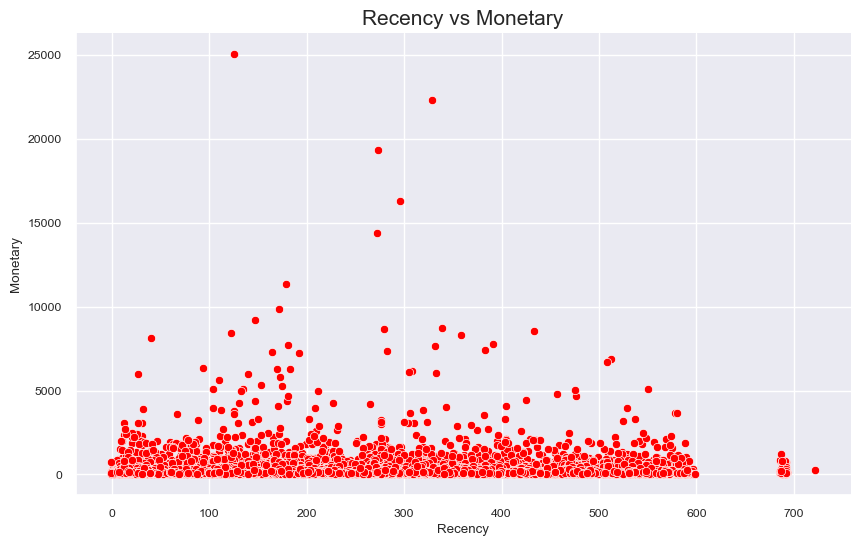

In [136]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', color='red', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

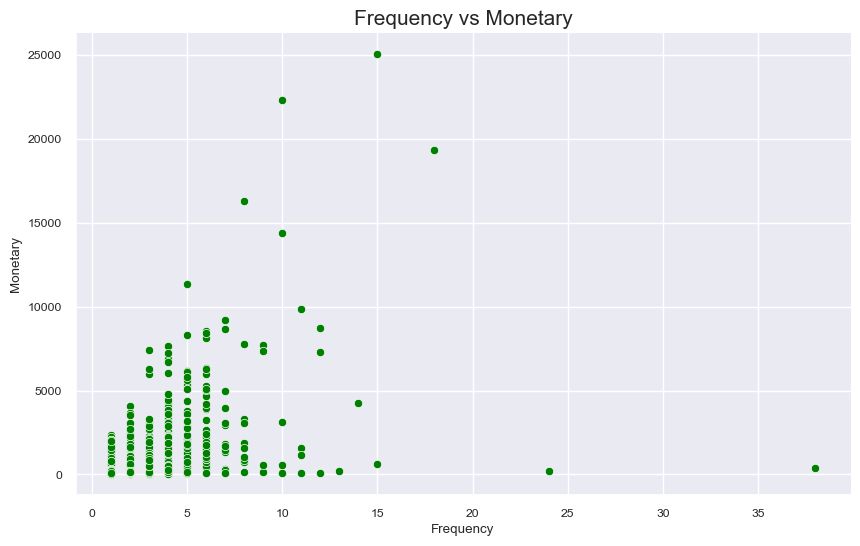

In [137]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequency', y='Monetary', color='green', data=rfm_table)
plt.title('Frequency vs Monetary', fontsize= 15)
sns.despine()

In [138]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

,customer_unique_id,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score
0,00053a61a98854899e70ed204dd4bafe,180,2,838.36,3,4,4,344
1,00115fc7123b5310cf6d3a3aa932699e,583,1,76.11,1,1,2,112
2,001928b561575b2821c92254a2327d06,3,1,164.81,4,1,3,413
3,002043098f10ba39a4600b6c52fbfe3c,519,1,237.81,1,1,4,114
4,002311514717ca8b65b09a26cdf7b91a,61,1,124.32,4,1,2,412
...,...,...,...,...,...,...,...,...
15588,ffe204b1bb8026741b839085b2fd10f2,18,1,156.70,4,4,3,443
15589,ffee94d548cef05b146d825a7648dab4,31,1,35.36,4,4,1,441
15590,ffef0ffa736c7b3d9af741611089729b,455,1,139.07,1,4,3,143
15591,fff2ae16b99c6f3c785f0e052f2a9cfb,129,1,200.90,3,4,3,343


In [140]:
def customer_segmentation(rfm_score):
  
  if rfm_score >= 444:
    return 'VIP'
  
  elif  rfm_score >= 404 and rfm_score < 444:
    return 'Very Loyal'
  
  elif   rfm_score >=364 and rfm_score< 404:
    return 'Loyal'
  
  elif rfm_score>=324 and rfm_score < 364:
    return 'New customer'
  
  elif rfm_score>=284 and rfm_score< 324:
    return 'Potential customer'
  
  elif rfm_score>=244 and rfm_score<284:
    return 'High risk to churn' 
  
  else:
    return 'Lost customer'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmentation)

rfm_table

,customer_unique_id,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,customer_segmentation
0,00053a61a98854899e70ed204dd4bafe,180,2,838.36,3,4,4,344,New customer
1,00115fc7123b5310cf6d3a3aa932699e,583,1,76.11,1,1,2,112,Lost customer
2,001928b561575b2821c92254a2327d06,3,1,164.81,4,1,3,413,Very Loyal
3,002043098f10ba39a4600b6c52fbfe3c,519,1,237.81,1,1,4,114,Lost customer
4,002311514717ca8b65b09a26cdf7b91a,61,1,124.32,4,1,2,412,Very Loyal
...,...,...,...,...,...,...,...,...,...
15588,ffe204b1bb8026741b839085b2fd10f2,18,1,156.70,4,4,3,443,Very Loyal
15589,ffee94d548cef05b146d825a7648dab4,31,1,35.36,4,4,1,441,Very Loyal
15590,ffef0ffa736c7b3d9af741611089729b,455,1,139.07,1,4,3,143,Lost customer
15591,fff2ae16b99c6f3c785f0e052f2a9cfb,129,1,200.90,3,4,3,343,New customer


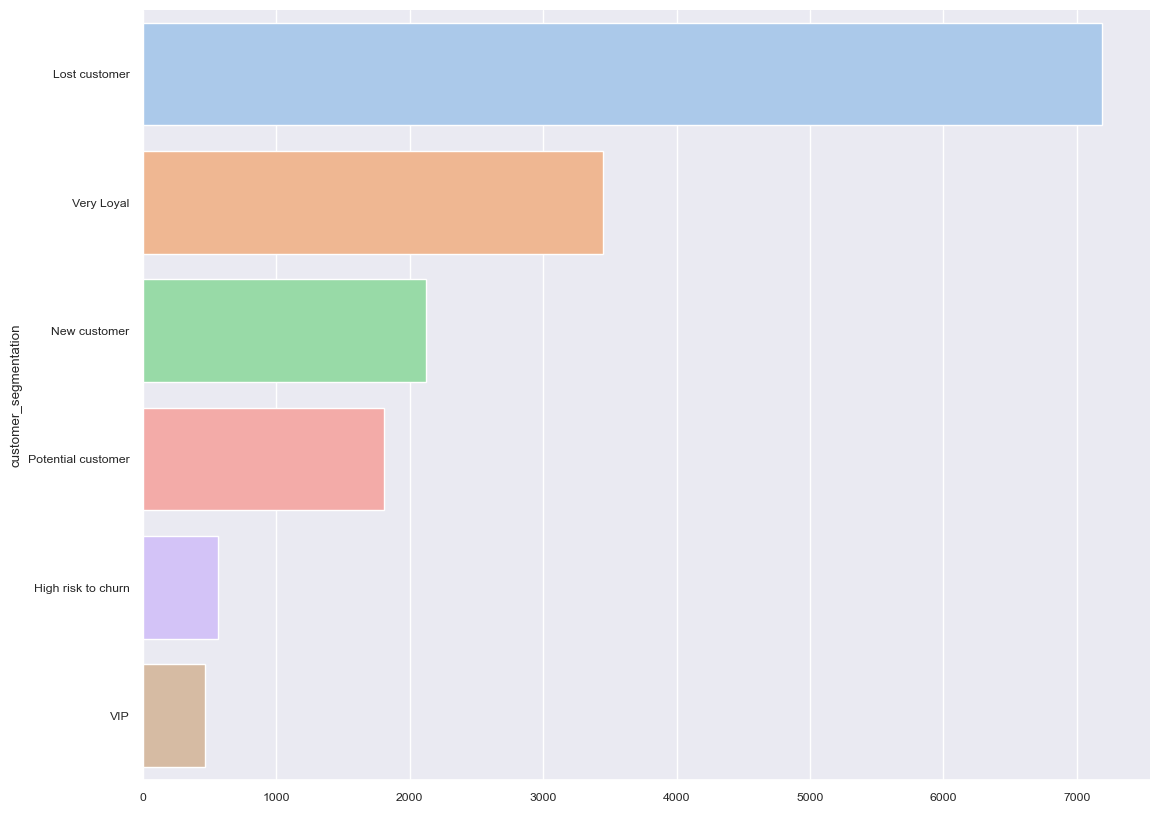

In [141]:
plt.figure(figsize=[13,10])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'pastel')
sns.despine()

In [142]:
rfm_table.describe()

,Recency,Frequency,Monetary,rfm_score
count,15593.000000,15593.000000,15593.000000,15593.000000
mean,245.724556,1.282627,237.563011,277.938242
std,157.782378,0.888884,582.492145,112.001096
min,-1.000000,1.000000,10.890000,111.000000
25%,121.000000,1.000000,72.570000,211.000000
50%,222.000000,1.000000,127.920000,311.000000
75%,361.000000,1.000000,221.790000,411.000000
max,722.000000,38.000000,25051.890000,444.000000


<Axes: xlabel='Recency'>

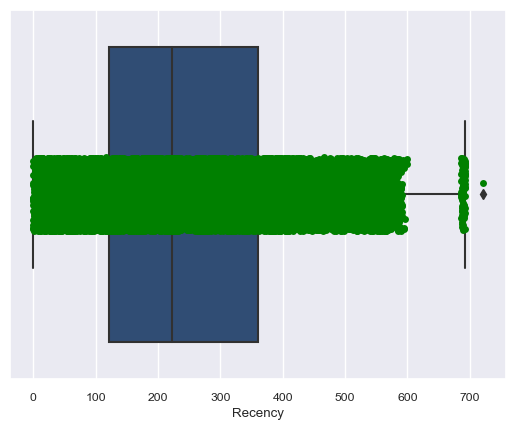

In [143]:
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'green')

<Axes: xlabel='Frequency'>

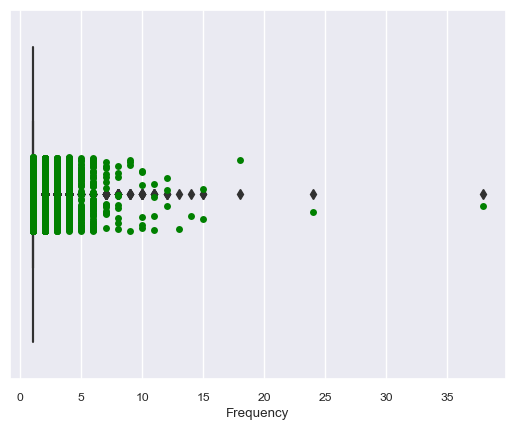

In [144]:
sns.boxplot(x= rfm_table.Frequency)
sns.stripplot(x = rfm_table.Frequency, color= 'green')

<Axes: xlabel='Monetary'>

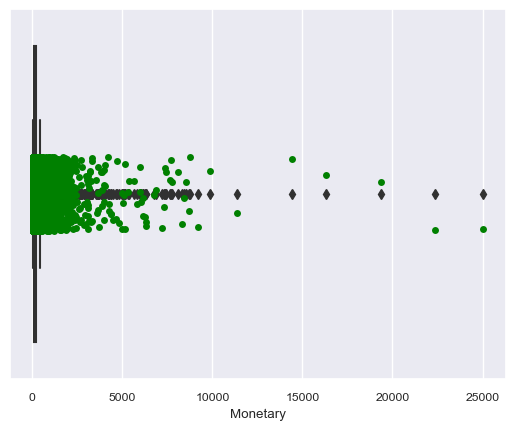

In [115]:
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'green')

In [116]:
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequency, 5), np.percentile(rfm_table.Frequency, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 22.0 539.0
Frequancy 5% Outliers Limits: 1.0 3.0
Monetary 5% Outliers Limits: 35.786 713.7099999999999


In [117]:
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


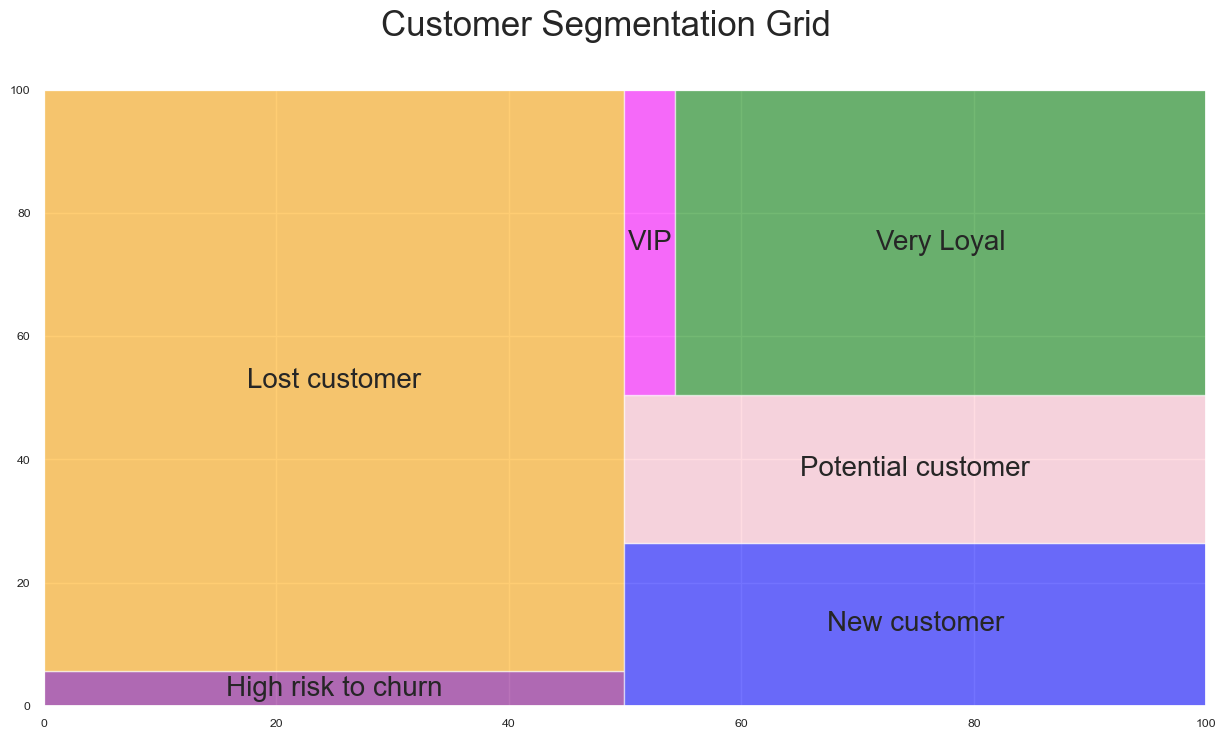

In [118]:
!pip install squarify
import squarify

plt.figure(figsize=[15,8])
plt.rc('font', size=20)

Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()
squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["purple", "orange", "blue", "pink", "fuchsia", "green", "skyblue"], alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=25);

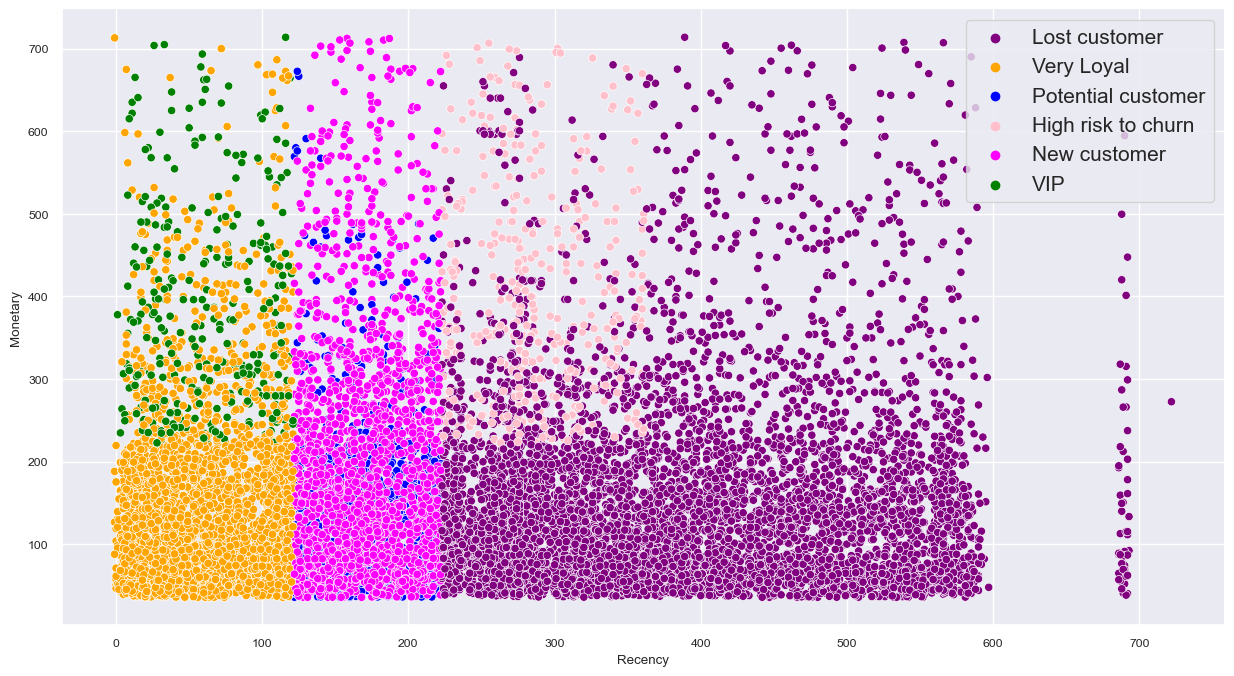

In [119]:
plt.figure(figsize= [15, 8])
colors = ["purple", "orange", "blue", "pink", "fuchsia", "green"]
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':15})
sns.despine()

# Recommendation

In [147]:
merged_df = df2.merge(rfm_table[['customer_unique_id', 'customer_segmentation']], on='customer_unique_id', how='left')
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review,customer_segmentation
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:00,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied,Lost customer
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:00,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied,High risk to churn
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:00,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied,High risk to churn
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:00,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral,Lost customer
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied,Potential customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,984e2ab6a072e04516bca3040606d641,9ec2ff36367734940e440491b6e4f59a,35600,bom despacho,MG,ee8725c782f35716fe7a9e445bbf0a78,2017-09-11 09:46:00,6f8f1480a063dfa15164baddcb4dc768,5,nan,...,boleto,1,92.90,89120,timbo,SC,sports leisure,Entertainment,Satisfied,Lost customer
19996,e8c9e9de9411a9a78629b376f75b18b3,acc71fc18279e5859ab1e867a2e6aec4,89245,araquari,SC,5d333a08c9bce16bf18ed14c4469c1ce,2017-10-03 22:51:00,0214baa1c6d16bbfe6b016f8e4c8dd6a,1,"Recebi, antes do prazo de entrega. Porém no me...",...,credit card,1,79.51,89120,timbo,SC,sports leisure,Entertainment,Not Satisfied,Lost customer
19997,48a0d58b5c9638c5d1bd192c4143f971,4426a915a8e65d0f7c66a021b1590559,95630,parobe,RS,f3946e7bb785f6ad1f6747355f2f0707,2017-09-13 16:48:00,65613a7e99fb0b7dfa2f37a1aebe8680,5,nan,...,boleto,1,82.12,89120,timbo,SC,sports leisure,Entertainment,Satisfied,Lost customer
19998,764b644da47fd5bb41b7d78590cffaa6,edb02b1c1d841706083765e2c524fd01,13024,campinas,SP,13c8da80a4b1a89a063dee494d324423,2017-02-05 19:34:00,9ef12de4c2174d61a6c6848b8a6a0b03,5,nan,...,boleto,1,81.57,89120,timbo,SC,sports leisure,Entertainment,Satisfied,Lost customer


In [148]:
import numpy as np
import pandas as pd
#random=merged_df.sample(n=5000)
#random.to_csv('df_test.csv')

In [149]:
df_test=pd.read_csv("df_test.csv")
df_test

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review,customer_segmentation
0,14307,10567872c1e2e0ba7172faf0a144c21d,461b0e7c11ff521493eaa69ad24e7b3d,9993,diadema,SP,cbd5da59166957ccd5a0c52607f2e98d,2017-08-07 01:12:00,3629f8ab06ec1a0d5576169851285d14,4,...,credit card,1,33.17,11010,santos,SP,auto,Electronics,Satisfied,Lost customer
1,8249,4aef40631e110fb4b8b98da55666faf0,bf4ab46b9030a846535307564fd4f525,21321,rio de janeiro,RJ,9ed2c225dae392f79f0842d160072572,2018-05-21 23:35:00,eded88aa6c82afaaf62c6858d2de06b9,3,...,boleto,1,381.57,9725,sao bernardo do campo,SP,furniture decor,Furniture,Neutral,VIP
2,7825,c59308d2a8b807a93f3a7d00e9f2b222,24c2fad8c24d02f02cac801f74d6a6cf,31140,belo horizonte,MG,0b2942062fff77e603cf4837c421e9a5,2017-02-07 11:34:00,a19debc1c895ed0758420ce5657a9785,5,...,credit card,4,199.09,86600,rolandia,PR,furniture decor,Furniture,Satisfied,Lost customer
3,19310,91ef15a60f302d55d0f2867836abca9c,da79f631be2ff2b72fae0427676727bc,57036,maceio,AL,0b8a71b3f5c221a69f4d23097cd604f6,2017-06-09 13:59:00,cdcf82b49e01a3dfb63c4f36fd9fe4f2,4,...,credit card,3,129.22,92030,canoas,RS,sports leisure,Entertainment,Satisfied,Lost customer
4,9617,7f3994454246f19eb6e9b1c52af0572d,11d07d8ffcdb81279bb38d710648ce6f,89820,xanxere,SC,cb33ba59f7f3b3d1f5caf3e8176551ea,2017-08-16 17:31:00,537f04cd5da884171ccab2680eb6c960,5,...,boleto,1,64.00,86385,andira-pr,PR,furniture decor,Furniture,Satisfied,Lost customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3320,f221dd968c17b94730bd38fd6fdd37ea,dac0540077981a7fd7524504a8785267,18760,cerqueira cesar,SP,9c8b8ff59ab268b976e66d35464ac79b,2017-09-01 21:50:00,523e3fc5af0fc1e01a6dad59f8e267ed,1,...,credit card,4,150.75,3204,sao paulo,SP,furniture decor,Furniture,Not Satisfied,High risk to churn
4996,15159,a091a44d41f56b046ebfc36aea2c96fe,a3869c580baca0193761f8c48e293266,12226,sao jose dos campos,SP,bb24f9658de05baa4397140cb9116911,2017-04-19 23:03:00,fac0df3029cd774b31707b3d528793aa,5,...,credit card,5,282.50,9015,santo andre,SP,auto,Electronics,Satisfied,Lost customer
4997,6369,eea81ec9d315c8f8a46c7888c7475fe5,537799a8ba7722e7776fe9aa7dd25612,40310,salvador,BA,f86df9fa4000285e8ba647d4c6df5b7c,2017-10-25 10:08:00,4e4b4a3a6a0c99e89d11d4499b934b63,5,...,credit card,3,114.18,19025,presidente prudente,SP,furniture decor,Furniture,Satisfied,High risk to churn
4998,14857,464b815e53d5593b7748577c0c8b0c2f,4189ff9ea486c4cd42da6c3dbebb27ca,78020,cuiaba,MT,7c62cf0327c291a9f3d7d3394b4c0166,2018-08-12 17:13:00,7738001f64428ab6c2d6f4a991dcdd2b,5,...,credit card,1,75.34,7183,guarulhos,SP,auto,Electronics,Satisfied,Very Loyal


In [152]:
df_test=pd.DataFrame(df_test)
df_test

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review,customer_segmentation
0,14307,10567872c1e2e0ba7172faf0a144c21d,461b0e7c11ff521493eaa69ad24e7b3d,9993,diadema,SP,cbd5da59166957ccd5a0c52607f2e98d,2017-08-07 01:12:00,3629f8ab06ec1a0d5576169851285d14,4,...,credit card,1,33.17,11010,santos,SP,auto,Electronics,Satisfied,Lost customer
1,8249,4aef40631e110fb4b8b98da55666faf0,bf4ab46b9030a846535307564fd4f525,21321,rio de janeiro,RJ,9ed2c225dae392f79f0842d160072572,2018-05-21 23:35:00,eded88aa6c82afaaf62c6858d2de06b9,3,...,boleto,1,381.57,9725,sao bernardo do campo,SP,furniture decor,Furniture,Neutral,VIP
2,7825,c59308d2a8b807a93f3a7d00e9f2b222,24c2fad8c24d02f02cac801f74d6a6cf,31140,belo horizonte,MG,0b2942062fff77e603cf4837c421e9a5,2017-02-07 11:34:00,a19debc1c895ed0758420ce5657a9785,5,...,credit card,4,199.09,86600,rolandia,PR,furniture decor,Furniture,Satisfied,Lost customer
3,19310,91ef15a60f302d55d0f2867836abca9c,da79f631be2ff2b72fae0427676727bc,57036,maceio,AL,0b8a71b3f5c221a69f4d23097cd604f6,2017-06-09 13:59:00,cdcf82b49e01a3dfb63c4f36fd9fe4f2,4,...,credit card,3,129.22,92030,canoas,RS,sports leisure,Entertainment,Satisfied,Lost customer
4,9617,7f3994454246f19eb6e9b1c52af0572d,11d07d8ffcdb81279bb38d710648ce6f,89820,xanxere,SC,cb33ba59f7f3b3d1f5caf3e8176551ea,2017-08-16 17:31:00,537f04cd5da884171ccab2680eb6c960,5,...,boleto,1,64.00,86385,andira-pr,PR,furniture decor,Furniture,Satisfied,Lost customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3320,f221dd968c17b94730bd38fd6fdd37ea,dac0540077981a7fd7524504a8785267,18760,cerqueira cesar,SP,9c8b8ff59ab268b976e66d35464ac79b,2017-09-01 21:50:00,523e3fc5af0fc1e01a6dad59f8e267ed,1,...,credit card,4,150.75,3204,sao paulo,SP,furniture decor,Furniture,Not Satisfied,High risk to churn
4996,15159,a091a44d41f56b046ebfc36aea2c96fe,a3869c580baca0193761f8c48e293266,12226,sao jose dos campos,SP,bb24f9658de05baa4397140cb9116911,2017-04-19 23:03:00,fac0df3029cd774b31707b3d528793aa,5,...,credit card,5,282.50,9015,santo andre,SP,auto,Electronics,Satisfied,Lost customer
4997,6369,eea81ec9d315c8f8a46c7888c7475fe5,537799a8ba7722e7776fe9aa7dd25612,40310,salvador,BA,f86df9fa4000285e8ba647d4c6df5b7c,2017-10-25 10:08:00,4e4b4a3a6a0c99e89d11d4499b934b63,5,...,credit card,3,114.18,19025,presidente prudente,SP,furniture decor,Furniture,Satisfied,High risk to churn
4998,14857,464b815e53d5593b7748577c0c8b0c2f,4189ff9ea486c4cd42da6c3dbebb27ca,78020,cuiaba,MT,7c62cf0327c291a9f3d7d3394b4c0166,2018-08-12 17:13:00,7738001f64428ab6c2d6f4a991dcdd2b,5,...,credit card,1,75.34,7183,guarulhos,SP,auto,Electronics,Satisfied,Very Loyal


In [153]:
matrix=df_test.pivot_table(index='customer_id', columns='product_id', values='review_score', fill_value=0)

In [154]:
matrix

product_id,00088930e925c41fd95ebfe695fd2655,001b72dfd63e9833e8c02742adf472e3,003938452c98ff9ab28e9e7b4bfe97ab,0043c62d00db47eff6a6bc4cf6bfaeda,004552d98c5d3653af8b4dbe8def0048,008cff0e5792219fae03e570f980b330,00aa70fd749f3b9ce8ca4bc914a9e7b1,00bb62ea3729537a687c3fddcd123662,00d62d0388b0786d730a1aaed91c0ae0,00d93a09990b319a7c946ed7a8c67656,...,feb94d995efca232513a7baffff772b8,fec85e6c0eab9b4bcddf9ccd917c80bc,feedec0f9090d3736d54758da8a1d05b,fef4145d5309c82cd34bdfe608dd323c,ff26009ac6b838dc6cffa2d589cdbefb,ff37b24bee4345bc69d11fae0e6cd3da,ff3ec972ebd16eb98d55e8ea2fa255ee,ff62ab4c255754dd5cfbd1822cd97b40,ff817f0901191fbe02933928daa95e6e,ff9fa77f938462abd16b53c0d934099f
customer_id,,,,,,,,,,,,,,,,,,,,,
000bf8121c3412d3057d32371c5d3395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00314f95a054231742e3c5396b333b88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00330644cccc5db0276fa836976306fe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0045ac1c0957bc92e109f71e4941fa49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0061937e85c708a41f5d5b24405d0f50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd1de7d1aaba96f625807ae058cda15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffde64401f7cb62d2e8696d9467c781d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fff168ca1f8a1d2e8e2108b231a68a8c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X=matrix.T.corr()
X.head()

customer_id,000bf8121c3412d3057d32371c5d3395,00314f95a054231742e3c5396b333b88,00330644cccc5db0276fa836976306fe,0045ac1c0957bc92e109f71e4941fa49,0061937e85c708a41f5d5b24405d0f50,006e35001c6c8c65ad4b20a8925d2b9f,007612fef51262f4762d32add5d128cc,007732425b3cfb147a3ca928ce907cc1,007b7f04a35e02745c23ea706492ca20,007d1c8a4fe2a7d4233d5ad3ea74a29b,...,ff9c535af2f9325df8f3c81f30f60b8b,ffa36f901675ec7bb972fc9c0d773d1f,ffc1df0bc187796047379f3b99a4f08c,ffc261b1c1e12a951ee0fc9d27463d3d,ffd14a431366fce43a5e77826b9f2ffa,ffd1de7d1aaba96f625807ae058cda15,ffde64401f7cb62d2e8696d9467c781d,fff168ca1f8a1d2e8e2108b231a68a8c,fff39f01a81d96b066b1893ad395a98b,fff3a5c6d542d52b05f7e4518adf996e
customer_id,,,,,,,,,,,,,,,,,,,,,
000bf8121c3412d3057d32371c5d3395,1.000000,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,...,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382
00314f95a054231742e3c5396b333b88,-0.000382,1.000000,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,...,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382
00330644cccc5db0276fa836976306fe,-0.000382,-0.000382,1.000000,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,...,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382
0045ac1c0957bc92e109f71e4941fa49,-0.000382,-0.000382,-0.000382,1.000000,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,...,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382
0061937e85c708a41f5d5b24405d0f50,-0.000382,-0.000382,-0.000382,-0.000382,1.000000,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,...,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382,-0.000382


In [156]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(4622, 10)

In [157]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape
correlation_matrix

array([[ 1.        ,  1.        , -0.63114023, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        , -0.63114023, ...,  1.        ,
         1.        ,  1.        ],
       [-0.63114023, -0.63114023,  1.        , ..., -0.63114023,
        -0.63114023, -0.63114023],
       ...,
       [ 1.        ,  1.        , -0.63114023, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        , -0.63114023, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        , -0.63114023, ...,  1.        ,
         1.        ,  1.        ]])

In [158]:
n = input("Enter your ID: ")

In [159]:
i=n

customer_ID = list(X.index)
customer_indx = customer_ID.index(i)
customer_indx

4

In [160]:
correlation_customer_ID = correlation_matrix[customer_indx]
correlation_customer_ID.shape

(4622,)

In [161]:
Recommend = list(X.index[correlation_customer_ID > 0.5])

#remove the customer in list
Recommend.remove(i) 

#top 10 similar users to customer
list2=Recommend[0:10]
list2

['000bf8121c3412d3057d32371c5d3395',
 '00314f95a054231742e3c5396b333b88',
 '0045ac1c0957bc92e109f71e4941fa49',
 '006e35001c6c8c65ad4b20a8925d2b9f',
 '007612fef51262f4762d32add5d128cc',
 '007732425b3cfb147a3ca928ce907cc1',
 '007b7f04a35e02745c23ea706492ca20',
 '007d1c8a4fe2a7d4233d5ad3ea74a29b',
 '0088393a302a84e57cc69c9d365f5efa',
 '00bf0246fe43d0dac8842035f21f8a76']

In [171]:
customer_segmentation_result = df_test[df_test['customer_id'] == n]['customer_segmentation'].values[0]

print("Status for ID =", n, "in our business is:", customer_segmentation_result, ".")

Status for ID = 0061937e85c708a41f5d5b24405d0f50 in our business is: Very Loyal .


In [162]:
result = df_test[df_test['customer_id'].isin(list2)]
result

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review,customer_segmentation
460,2276,007612fef51262f4762d32add5d128cc,2f53681bf01c5cff02bada5809fe302e,3611,sao paulo,SP,0cc76fbe09687fda664178e9fc6c404f,2017-12-30 22:51:00,a738aa683a09dc5979abc7d9c2cc8029,5,...,credit card,10,102.87,12080,taubate,SP,furniture decor,Furniture,Satisfied,Lost customer
870,14369,007732425b3cfb147a3ca928ce907cc1,fcad3faa5c09b2baf9164b8fd20098b5,3041,sao paulo,SP,e730263138d4e66152a694fd4ec32280,2017-09-12 16:15:00,8f282ea763cd9522a833838571012235,5,...,boleto,1,195.92,80045,curitiba,PR,auto,Electronics,Satisfied,Lost customer
900,9727,000bf8121c3412d3057d32371c5d3395,1bc9b2dad6aefbfbc011508e34c8adfc,12335,jacarei,SP,bc3e295306ee4d3eba91aca49b0bb539,2017-10-11 07:44:00,283ae035dc60538aa6d786eee8e62d83,5,...,credit card,1,45.56,4362,sao paulo,SP,furniture decor,Furniture,Satisfied,Lost customer
1224,18510,007d1c8a4fe2a7d4233d5ad3ea74a29b,68652e69a77dec3f573ef0135541f6b5,30260,belo horizonte,MG,91151a1839749882e607fb8d0c0a2a71,2018-01-10 21:48:00,168ba75065b80ec0f41e3e358d21f362,4,...,boleto,1,38.56,35530,claudio,MG,sports leisure,Entertainment,Satisfied,Lost customer
2005,8647,0088393a302a84e57cc69c9d365f5efa,e8085241eb1297eaa9bfa9453ea0b1ca,25880,sapucaia,RJ,7bcfe636f4605ba8f3e44cae6a4058a4,2017-07-14 12:40:00,df71cd4c6cc52424b285b67389e5f12e,5,...,credit card,3,66.01,15704,jales,SP,furniture decor,Furniture,Satisfied,Lost customer
2329,14264,00314f95a054231742e3c5396b333b88,aaf46bd4e1ad43275a5a20bd485e7661,11440,guaruja,SP,3ecc3564cd9c6190ef2a103f37351bb9,2018-01-08 19:29:00,dca740d6b8869a20d8e4c99996ae12bf,5,...,credit card,1,59.34,9560,sao caetano do sul,SP,auto,Electronics,Satisfied,Lost customer
2446,18509,007d1c8a4fe2a7d4233d5ad3ea74a29b,68652e69a77dec3f573ef0135541f6b5,30260,belo horizonte,MG,91151a1839749882e607fb8d0c0a2a71,2018-01-10 21:48:00,168ba75065b80ec0f41e3e358d21f362,4,...,boleto,1,38.56,35530,claudio,MG,sports leisure,Entertainment,Satisfied,Lost customer
2828,3931,0045ac1c0957bc92e109f71e4941fa49,7ad12bd39f33737cb4f634c8c44af118,5027,sao paulo,SP,67f9754feffe51587eed05ba198d21b0,2018-06-30 11:49:00,8a46aaf3137a302e49b62375dfee6f8e,5,...,credit card,10,152.47,3204,sao paulo,SP,furniture decor,Furniture,Satisfied,Very Loyal
3609,4584,007b7f04a35e02745c23ea706492ca20,46dd28b3f7e33b789acf42d3093b7773,35950,alvinopolis,MG,956f15dfe9a7f2414a02c445fdbb865a,2017-01-21 18:37:00,9dc35c0d556a65f1c4aff189de0d60c3,4,...,credit card,1,77.06,14940,ibitinga,SP,furniture decor,Furniture,Satisfied,Lost customer
3923,16519,00bf0246fe43d0dac8842035f21f8a76,29869c1422b9c068973f8e44575f73d6,18550,boituva,SP,4d59cd41f4606ae83af4985a74ae1354,2018-01-22 11:56:00,2bec15dee26f1b6ff02c07f7563945db,4,...,credit card,1,162.06,14070,ribeirao preto,SP,sports leisure,Entertainment,Satisfied,Potential customer


In [163]:
print('You are our ', 'These are some item categories recommendations for you,\n', result['product_category_name_english'].sample(n=5))

These are some item categories recommendations for you,
 2005    furniture decor
2828    furniture decor
1224     sports leisure
870                auto
4597     sports leisure
Name: product_category_name_english, dtype: object


In [164]:
#pip install pyimage


In [165]:
'''import tkinter as tk
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk, Image
from functools import partial
import pandas as pd

# Sample DataFrame (Replace this with your actual DataFrame)
df = pd.read_csv('df_test.csv')


def validateLogin(id):
    customer_id = str(id.get())
    customer_unique_id = df.loc[df['customer_id'] == customer_id, 'Unique ID'].values
    if len(customer_unique_id) > 0:
        print("Customer Unique ID:", customer_unique_id[0])
    else:
        messagebox.showerror("Error", "Customer ID not found!")

root = tk.Tk()
root.title('Customer Login')
root.geometry('500x500')
root.configure(bg='#fff')
root.resizable(False, False)

# Load the image using PIL
background_image = Image.open("img.png")
background_image = ImageTk.PhotoImage(background_image)

# Create a label to display the background image
background_label = tk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

idLabel = Label(root, text="Customer ID")
idLabel.place(relx=0.4, rely=0.4, anchor=CENTER)

id = StringVar()
idEntry = Entry(root, textvariable=id)
idEntry.place(relx=0.6, rely=0.4, anchor=CENTER)

validateLogin = partial(validateLogin, id)

loginButton = Button(root, text="Login", command=validateLogin)
loginButton.place(relx=0.5, rely=0.5, anchor=CENTER)

# Attach the image to the root window to keep the reference
root.image = background_image

root.mainloop()'''

'import tkinter as tk\nfrom tkinter import *\nfrom tkinter import messagebox\nfrom PIL import ImageTk, Image\nfrom functools import partial\nimport pandas as pd\n\n# Sample DataFrame (Replace this with your actual DataFrame)\ndf = pd.read_csv(\'df_test.csv\')\n\n\ndef validateLogin(id):\n    customer_id = str(id.get())\n    customer_unique_id = df.loc[df[\'customer_id\'] == customer_id, \'Unique ID\'].values\n    if len(customer_unique_id) > 0:\n        print("Customer Unique ID:", customer_unique_id[0])\n    else:\n        messagebox.showerror("Error", "Customer ID not found!")\n\nroot = tk.Tk()\nroot.title(\'Customer Login\')\nroot.geometry(\'500x500\')\nroot.configure(bg=\'#fff\')\nroot.resizable(False, False)\n\n# Load the image using PIL\nbackground_image = Image.open("img.png")\nbackground_image = ImageTk.PhotoImage(background_image)\n\n# Create a label to display the background image\nbackground_label = tk.Label(root, image=background_image)\nbackground_label.place(x=0, y=0, rel

In [166]:
#tkinter._test()